In [2]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [3]:
df = pd.read_csv("/content/power_data.csv")

In [10]:
df['Datetimeserverdell'] = pd.to_datetime(df['Datetimeserverdell'], format='%H:%M:%S')
df['Datetimeserverdell'] = df['Datetimeserverdell'].dt.hour * 3600 + df['Datetimeserverdell'].dt.minute * 60 + df['Datetimeserverdell'].dt.second

In [11]:
x = df[['Datetimeserverdell']]
y = df['Total Load kW']

In [12]:
svr_model = SVR(kernel='rbf') # Using radial basis function kernel for non-linearity
svr_model.fit(x, y)

SVR()

In [14]:
svr_predictions = svr_model.predict(x)

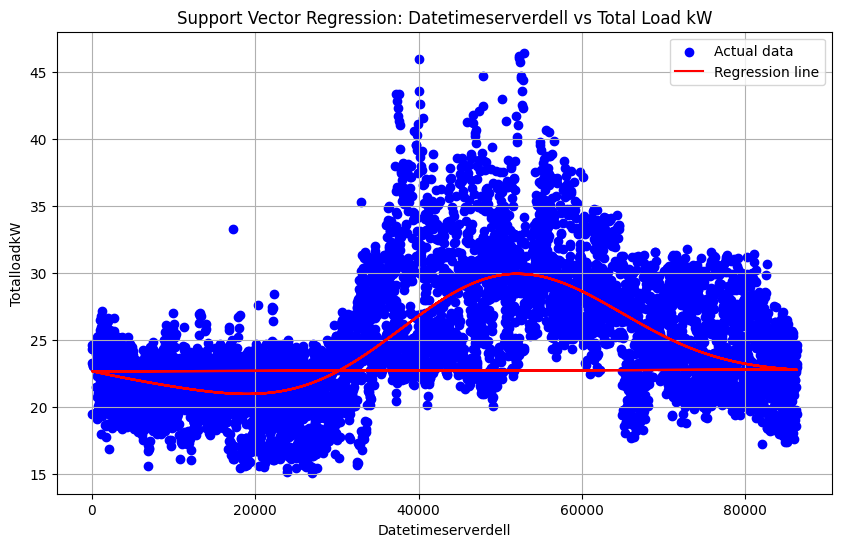

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, svr_predictions, color='red', label='Regression line')
plt.title('Support Vector Regression: Datetimeserverdell vs Total Load kW')
plt.xlabel('Datetimeserverdell')
plt.ylabel('TotalloadkW')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
svr_rmse = mean_squared_error(y, svr_predictions)
svr_mape = mean_absolute_percentage_error(y, svr_predictions)
svr_r2_score = svr_model.score(x, y)

In [16]:
print(f'RMSE: {3.372134534675}')
print(f'MAPE: {svr_mape}')
print(f'R² Score: {svr_r2_score}')

RMSE: 3.372134534675
MAPE: 0.10284378642622988
R² Score: 0.4809914299611183


In [17]:
new_time = np.array([[43200]])  # Replace 10 with the desired time value
predicted_load = svr_model.predict(new_time)
print(f"Predicted load for entered time {new_time[0][0]}: {predicted_load[0]}")

Predicted load for entered time 43200: 28.102257297328222


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
